# Solutions:
1. tfidf embeddings with open + dense neural
2. LSTM from previous days
3. fine tune transformer

In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv("./Combined_News_DJIA.csv")
df2 = pd.read_csv("./upload_DJIA_table.csv")
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


preprocess the dataset to look like in the problem

In [6]:
df = df1.merge(df2, left_on='Date', right_on='Date')
df.drop(['High','Low','Volume', 'Adj Close', 'Label'], axis=1, inplace=True)
df.drop(list(['Top'+str(i) for i in range(11,26)]), axis=1, inplace=True)
df['combined_news'] = df['Top1']
for i in range(2,10):
  df['combined_news'] = df['combined_news'] + df['Top'+str(i)] 

In [7]:
df.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Open,Close,combined_news
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',11432.089844,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",11729.669922,11782.349609,b'Why wont America and Nato help us? If they w...
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',11781.700195,11642.469727,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",11632.809570,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",b'Russia exaggerating South Ossetian death tol...,b' Musharraf expected to resign rather than fa...,11532.070312,11615.929688,b'All the experts admit that we should legalis...


In [8]:
df.drop(['Date'], inplace=True, axis=1)

## 1. tfidf embeddings with open + dense neural

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Close'],axis=1),df['Close'], test_size=0.2, random_state=1)
X_train.shape

(1591, 12)

In [7]:
from sklearn.preprocessing import StandardScaler

openscaler = StandardScaler()
X_train['Open'] = openscaler.fit_transform(X_train['Open'].to_numpy().reshape(-1,1))
X_test['Open'] = openscaler.transform(X_test['Open'].to_numpy().reshape(-1,1))

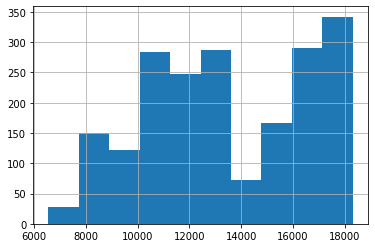

In [8]:
df['Close'].hist()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_vectors = vectorizer.fit_transform(X_train['combined_news'])
text_vectors.shape

(1591, 25387)

reduce dimensionality

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)
reduced_vectors = svd.fit_transform(text_vectors)
reduced_vectors.shape

(1591, 300)

add open to vector

In [11]:
X_train_clean = pd.concat((X_train['Open'].reset_index(drop=True), pd.DataFrame(reduced_vectors)), axis=1)

In [12]:
X_train_clean.head()

,Open,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.488722,0.232011,-0.049914,-0.007059,-0.007154,-0.014834,-0.034454,-0.008674,0.021662,-0.044697,...,-0.027066,0.029467,-0.009075,0.035979,-0.050271,0.040397,-0.029457,0.001778,0.008169,-0.010223
1,-1.634268,0.219599,-0.035806,0.084591,-0.036000,0.051558,0.004893,-0.076726,0.014367,0.008327,...,0.007881,-0.008854,0.002594,0.024141,-0.012897,-0.015244,0.005248,0.004814,-0.023092,-0.032825
2,1.331390,0.190698,-0.072917,0.024643,-0.034143,-0.013812,-0.053847,0.015948,-0.027510,0.046843,...,0.039259,-0.026355,-0.011763,0.042644,0.028329,-0.006550,-0.001551,-0.010303,0.009639,-0.013225
3,-0.652354,0.282965,-0.009686,0.053474,-0.028126,-0.047544,0.071947,-0.022884,0.001420,-0.044779,...,0.002533,-0.009181,0.003716,0.008248,0.018463,-0.038613,-0.027482,-0.030052,-0.022910,0.017389
4,0.856127,0.220498,-0.043753,0.001179,-0.069327,-0.092392,0.089161,0.078978,0.041592,0.115177,...,-0.003912,0.049076,0.002941,0.005973,-0.042941,-0.022094,0.002205,-0.004293,-0.017360,-0.032819


In [13]:
test_text_vectors = vectorizer.transform(X_test['combined_news'])
reduced_vectors_test = svd.transform(test_text_vectors)
X_test_clean = pd.concat((X_test['Open'].reset_index(drop=True), pd.DataFrame(reduced_vectors_test)), axis=1)
X_test_clean.head()

,Open,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,0.815498,0.308783,-0.086221,-0.017048,0.011844,0.011637,-0.005666,-0.008785,-0.002932,0.066641,...,0.015611,0.017890,-0.026463,0.005902,-0.002412,0.015074,-0.001306,0.000647,0.000978,0.005533
1,-0.621367,0.233129,-0.020984,0.020814,0.005903,-0.016959,-0.007098,-0.035147,-0.020020,0.012187,...,-0.004457,0.026578,0.016867,-0.009913,0.005467,-0.018385,0.011586,-0.003000,0.013773,-0.002243
2,1.171668,0.294409,0.004716,-0.043619,-0.002310,-0.023586,-0.038222,-0.010124,0.027902,-0.011551,...,-0.013613,-0.003307,0.000606,-0.009437,-0.021529,0.003498,-0.004419,0.001621,0.009990,0.000080
3,1.133692,0.252018,-0.048526,0.010648,-0.007814,-0.008157,-0.042922,-0.013640,-0.029669,0.017741,...,0.019639,0.017220,-0.010307,-0.012020,-0.010114,-0.008707,-0.014807,0.012144,-0.018523,-0.007189
4,-0.608649,0.233605,-0.041911,0.052899,0.038637,-0.028759,0.017772,-0.003581,-0.047459,-0.047134,...,-0.029630,-0.007209,-0.008151,-0.006653,0.012272,0.003249,0.001120,-0.007279,0.006611,-0.003002


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=301, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [15]:
history = model.fit(X_train_clean, Y_train, epochs=100, batch_size=16, validation_data=(X_test_clean, Y_test))

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 189047200.0000 - mse: 189047200.0000 - val_loss: 178205984.0000 - val_mse: 178205984.0000
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 82525920.0000 - mse: 82525920.0000 - val_loss: 1400721.7500 - val_mse: 1400721.7500
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1041407.7500 - mse: 1041407.7500 - val_loss: 359973.7188 - val_mse: 359973.7188
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 810460.6250 - mse: 810460.6250 - val_loss: 311647.2500 - val_mse: 311647.2500
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 732756.0625 - mse: 732756.0625 - val_loss: 220572.8438 - val_mse: 220572.8438
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 646666.5625 - mse: 646666.5625 - val_loss: 209855.5625 - val_mse: 209855.5625
Epoch 7/100
100/100 [==============================] - 0s 4ms/

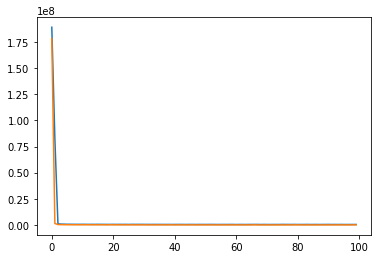

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(Y_train, model.predict(X_train_clean))

50/50 [==============================] - 0s 3ms/step


0.989533915611721

In [21]:
r2_score(Y_test, model.predict(X_test_clean))

13/13 [==============================] - 0s 3ms/step


0.9908205445141521

0.99 r^2 na test?? too good to be true???



## 2. LSTM from previous 3 days

In [22]:
matrix = []
for i in range(len(df['Close'])-1, 2, -1):
  
  day3=df['Close'][i-3]
  day2=df['Close'][i-2]
  day1=df['Close'][i-1]
  matrix.append([df['Close'][i], day1, day2, day3])

matrix

[[17949.369141, 17929.990234, 17694.679688, 17409.720703],
 [17929.990234, 17694.679688, 17409.720703, 17140.240234],
 [17694.679688, 17409.720703, 17140.240234, 17400.75],
 [17409.720703, 17140.240234, 17400.75, 18011.070312],
 [17140.240234, 17400.75, 18011.070312, 17780.830078],
 [17400.75, 18011.070312, 17780.830078, 17829.730469],
 [18011.070312, 17780.830078, 17829.730469, 17804.869141],
 [17780.830078, 17829.730469, 17804.869141, 17675.160156],
 [17829.730469, 17804.869141, 17675.160156, 17733.099609],
 [17804.869141, 17675.160156, 17733.099609, 17640.169922],
 [17675.160156, 17733.099609, 17640.169922, 17674.820312],
 [17733.099609, 17640.169922, 17674.820312, 17732.480469],
 [17640.169922, 17674.820312, 17732.480469, 17865.339844],
 [17674.820312, 17732.480469, 17865.339844, 17985.189453],
 [17732.480469, 17865.339844, 17985.189453, 18005.050781],
 [17865.339844, 17985.189453, 18005.050781, 17938.279297],
 [17985.189453, 18005.050781, 17938.279297, 17920.330078],
 [18005.05078

In [23]:
df_new = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
df_new.head()

,Close,One day ago,Two days ago,Three days ago
0,17949.369141,17929.990234,17694.679688,17409.720703
1,17929.990234,17694.679688,17409.720703,17140.240234
2,17694.679688,17409.720703,17140.240234,17400.750000
3,17409.720703,17140.240234,17400.750000,18011.070312
4,17140.240234,17400.750000,18011.070312,17780.830078


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_new.drop(['Close'],axis=1),df_new['Close'], test_size=0.2, random_state=1)
X_train.shape

(1588, 3)

In [25]:
fullscaler = StandardScaler()
X_train = fullscaler.fit_transform(X_train)
X_test = fullscaler.transform(X_test)

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
model = Sequential()

model.add(LSTM(128, input_shape=(1,3), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1 ,activation='linear'))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=150, batch_size=16)

Epoch 1/150
80/80 [==============================] - 4s 13ms/step - loss: 193727056.0000 - mean_absolute_error: 13562.4756 - val_loss: 184137152.0000 - val_mean_absolute_error: 13194.0254
Epoch 2/150
80/80 [==============================] - 1s 7ms/step - loss: 192168960.0000 - mean_absolute_error: 13503.3320 - val_loss: 180181088.0000 - val_mean_absolute_error: 13037.0264
Epoch 3/150
80/80 [==============================] - 1s 7ms/step - loss: 183563408.0000 - mean_absolute_error: 13170.4658 - val_loss: 165911952.0000 - val_mean_absolute_error: 12449.2832
Epoch 4/150
80/80 [==============================] - 1s 6ms/step - loss: 161861472.0000 - mean_absolute_error: 12279.5049 - val_loss: 137685232.0000 - val_mean_absolute_error: 11171.1924
Epoch 5/150
80/80 [==============================] - 1s 7ms/step - loss: 127407544.0000 - mean_absolute_error: 10689.3887 - val_loss: 101203008.0000 - val_mean_absolute_error: 9243.1709
Epoch 6/150
80/80 [==============================] - 1s 7ms/step 

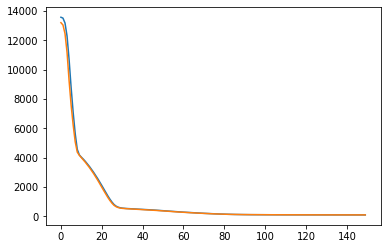

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.show()

In [31]:
r2_score(Y_train, model.predict(X_train))

50/50 [==============================] - 0s 3ms/step


0.9977667330075046

In [32]:
r2_score(Y_test, model.predict(X_test))

13/13 [==============================] - 0s 3ms/step


0.9977362733242737

great result, or is it???

## 3. fine tune transformer

In [9]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [10]:
import numpy as np
import pandas as pd
import transformers
from datasets import Dataset,load_dataset, load_from_disk
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding

In [11]:
df_new = df.iloc[:,10:]
df_new['label'] = df_new['Close']
df_new.drop(['Close'],axis=1, inplace=True)

In [12]:
dataset = Dataset.from_pandas(df_new,preserve_index=False) 
dataset = dataset.train_test_split(test_size=0.2) 
dataset

DatasetDict({
    train: Dataset({
        features: ['Open', 'combined_news', 'label'],
        num_rows: 1591
    })
    test: Dataset({
        features: ['Open', 'combined_news', 'label'],
        num_rows: 398
    })
})

In [13]:
def tokenize_function(example):
    return tokenizer(example["combined_news"], truncation=True)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenized_datasets = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [27]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--

In [15]:
from datasets import load_metric
from sklearn.metrics import mean_squared_error

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    rmse = mean_squared_error(labels, predictions, squared=False)
    return {"rmse": rmse}

In [28]:
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer",
                                  logging_strategy="epoch",
                                  evaluation_strategy="epoch",
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=16,
                                  num_train_epochs=5,
                                  save_total_limit = 2,
                                  save_strategy = 'no',
                                  load_best_model_at_end=False
                                  )
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [29]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: combined_news, Open. If combined_news, Open are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 1591
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 500
  Number of trainable parameters = 109483009


Epoch,Training Loss,Validation Loss,Rmse
1,191574773.760000,187404640.000000,13689.581055
2,191619932.160000,187312032.000000,13686.198242
3,191355412.480000,187255088.000000,13684.119141
4,191422197.760000,187222240.000000,13682.916992
5,191484846.080000,187211328.000000,13682.519531


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: combined_news, Open. If combined_news, Open are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 398
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: combined_news, Open. If combined_news, Open are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 398
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: combined_news, Open. If combined_news, Open are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this messa

TrainOutput(global_step=500, training_loss=191491432.448, metrics={'train_runtime': 466.4477, 'train_samples_per_second': 17.054, 'train_steps_per_second': 1.072, 'total_flos': 1282670808745146.0, 'train_loss': 191491432.448, 'epoch': 5.0})

In [37]:
predictions, labels, metrics = trainer.predict(tokenized_datasets['train'])

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: combined_news, Open. If combined_news, Open are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1591
  Batch size = 16


In [38]:
from sklearn.metrics import r2_score
r2_score(predictions.label_ids, predictions)

AttributeError: ignored

In [ ]:
predictions, labels, metrics = trainer.predict(tokenized_datasets['test'])

In [ ]:
from sklearn.metrics import r2_score
r2_score(predictions.label_ids, predictions)